# Student Performance
<!-- ### Steps follows (Life Cycle) in  Machine learning Project  
Understanding the Problem Statement  
-Data Collection   
-Data Checks to perform  
-Exploratory data analysis   
-Data Pre-Processing   
-Model Training   
-Choose best model    -->
### 1) Problem statement 
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
### 2) Data Collection 
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977  
The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages 
Importing Pandas, Numpy, Matplotlib, Seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('stud_data.csv')

Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information  
a)  gender : sex of students -> (Male/female)   
b)  race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)   
c)  parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)   
d)  lunch : having lunch before test (standard or free/reduced)   
e)  test preparation course : complete or not complete before test   
f)  math score   
g)  reading score   
h)  writing score 

### 3. Data Checks to perform   
Check Missing values    
Check Duplicates    
Check data type    
Check the number of unique values of each column   
Check statistics of data set   
Check various categories present in the different categorical column   

3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Check statistics of data set

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
-From above description of numerical data, all means are very close to each other - between 66 and 68.05;  
-All standard deviations are also close - between 14.6 and 15.19;  
-While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading most higher=17

3.5 Exploring Data

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3.6 Checking the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### 3.7 Adding columns for "Average"

In [4]:
df1=df.copy()
#df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df1['average'] =( (df['math_score'] + df['reading_score'] + df['writing_score'])/3 ).round(2)
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


Full marks in each Subjects &
less than 20 marks in each Subjects

In [15]:
# reading_full = df[df['reading_score'] == 100]['average'].count()
# writing_full = df[df['writing_score'] == 100]['average'].count()
# math_full = df[df['math_score'] == 100]['average'].count()

# print(f'Number of students with full marks in Maths: {math_full}')
# print(f'Number of students with full marks in Writing: {writing_full}')
# print(f'Number of students with full marks in Reading: {reading_full}')

In [16]:
# reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
# writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
# math_less_20 = df[df['math_score'] <= 20]['average'].count()

# print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
# print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
# print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

### Insights
From above values we get students have performed the worst in Maths   
Best performance is in reading section  

C:\Users\Ashish Kumar AK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ashish Kumar AK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ashish Kumar AK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

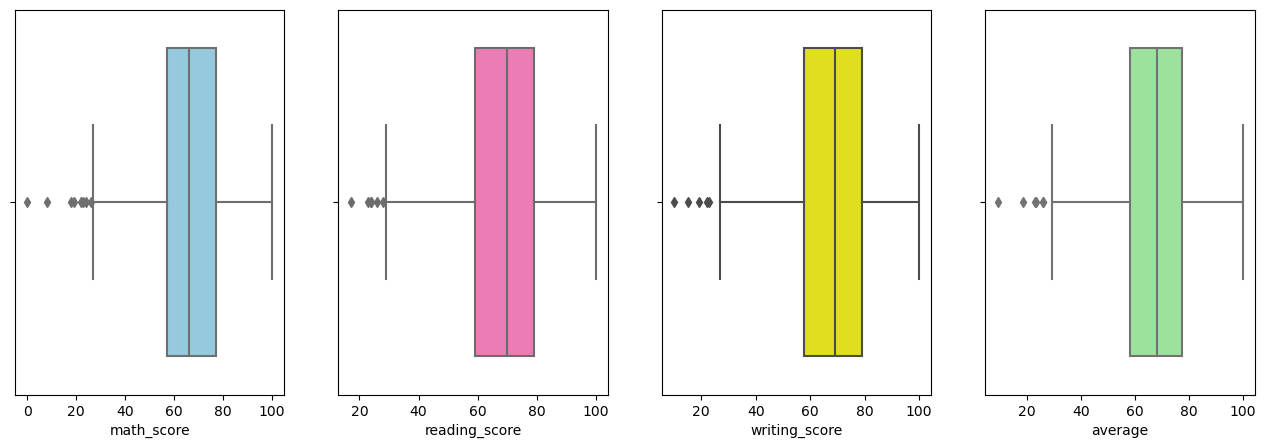

In [17]:
## CHECKING OUTLIERS

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df1['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df1['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df1['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df1['average'],color='lightgreen')
plt.show()

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.
Histogram  
Kernel Distribution Function (KDE)  
  

#### Gender Column 
How is distribution of Gender?  
 
Is gender has any impact on student’s performance?

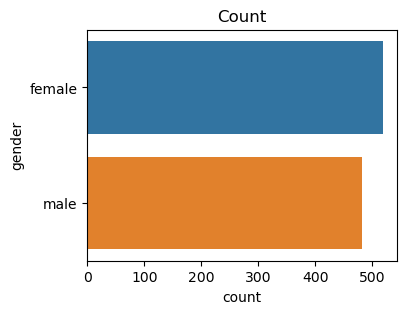

In [18]:
f,ax=plt.subplots(figsize=(4,3))
sns.countplot(y=df.gender,data=df).set_title('Count')
plt.show()

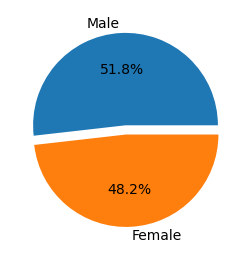

In [19]:
f,ax=plt.subplots(figsize=(4,3))
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%')
plt.show()

Gender has balanced data with female students are (48%) and male students are (52%)

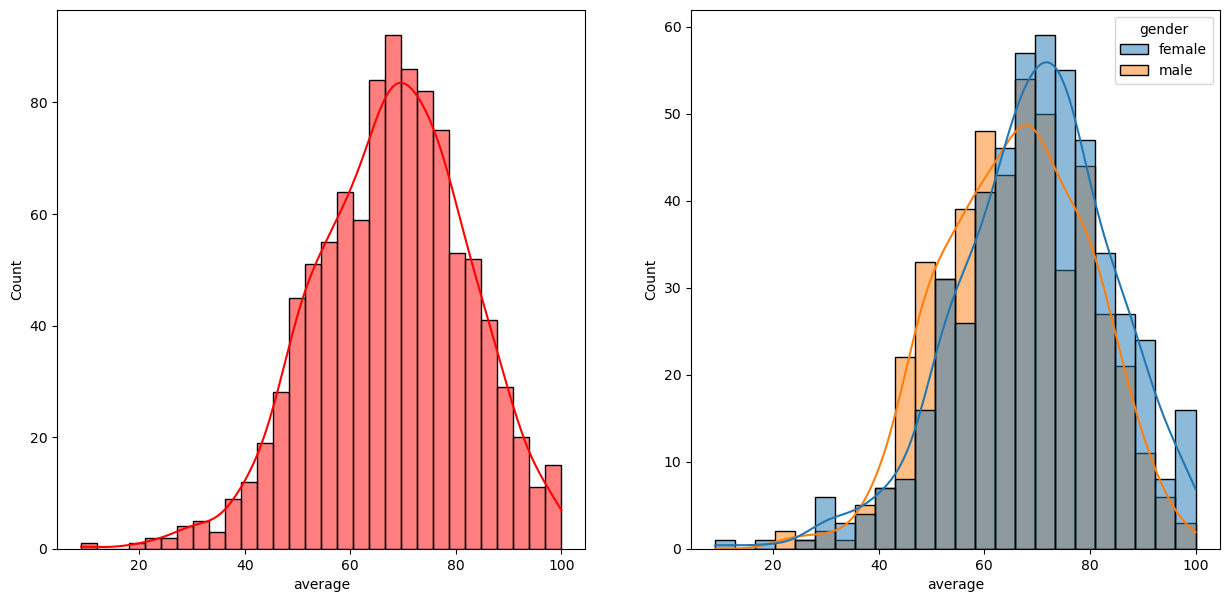

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df1,x='average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df1,x='average',kde=True,hue='gender')
plt.show()

### Insights  
Female students tend to perform well then male students.

In [21]:
# plt.subplots(1,3,figsize=(25,6))
# plt.subplot(141)
# sns.histplot(data=df,x='average',kde=True,hue='lunch')
# plt.subplot(142)
# sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
# plt.subplot(143)
# sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
# plt.show()

### Insights
Standard lunch helps perform well in exams.   
Standard lunch helps perform well in exams be it a male or a female.

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


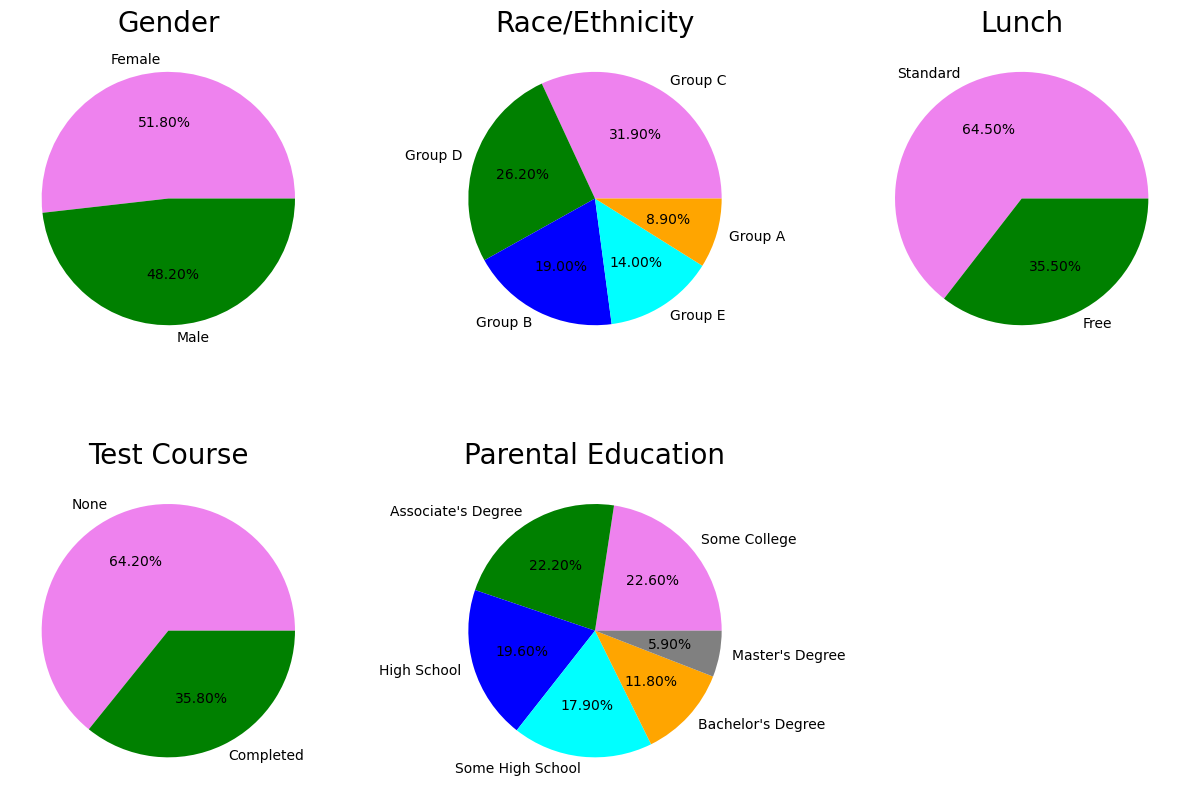

In [23]:
plt.rcParams['figure.figsize'] = (12, 9)

plt.subplot(2, 3, 1)
size = df1['gender'].value_counts()
labels = 'Female', 'Male'
color = ['violet','green']


plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 2)
size = df1['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['violet', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(2, 3, 3)
size = df1['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['violet','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 4)
size = df1['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['violet','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 5)
size = df1['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['violet', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights

-The number of Male and Female students is almost equal.   
-The number of students is higher in Group C.  
-The number of students who have standard lunch is greater.    
-The number of students who have not enrolled in any test preparation course is greater.  
-The number of students whose parental education is “Some College” is greater by Associate’s Degree”.  
From the above plot, it is clear that all the scores increase linearly with each other.   
 


### Feature Selection- With Correlation  
In this step we will be removing the features which are highly correlated

In [24]:
features = list( df1.columns ) 
features.remove('average') 
features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [25]:
# Encoding Categorical Features

encoded_df = pd.get_dummies(df1[features])
list(encoded_df.columns)
#encoded_df.shape

['math_score',
 'reading_score',
 'writing_score',
 'gender_female',
 'gender_male',
 'race_ethnicity_group A',
 'race_ethnicity_group B',
 'race_ethnicity_group C',
 'race_ethnicity_group D',
 'race_ethnicity_group E',
 "parental_level_of_education_associate's degree",
 "parental_level_of_education_bachelor's degree",
 'parental_level_of_education_high school',
 "parental_level_of_education_master's degree",
 'parental_level_of_education_some college',
 'parental_level_of_education_some high school',
 'lunch_free/reduced',
 'lunch_standard',
 'test_preparation_course_completed',
 'test_preparation_course_none']

In [26]:
encoded_df.shape

(1000, 20)

In [27]:
encoded_df.head()

,math_score,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [28]:
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


### Using Pearson Correlation

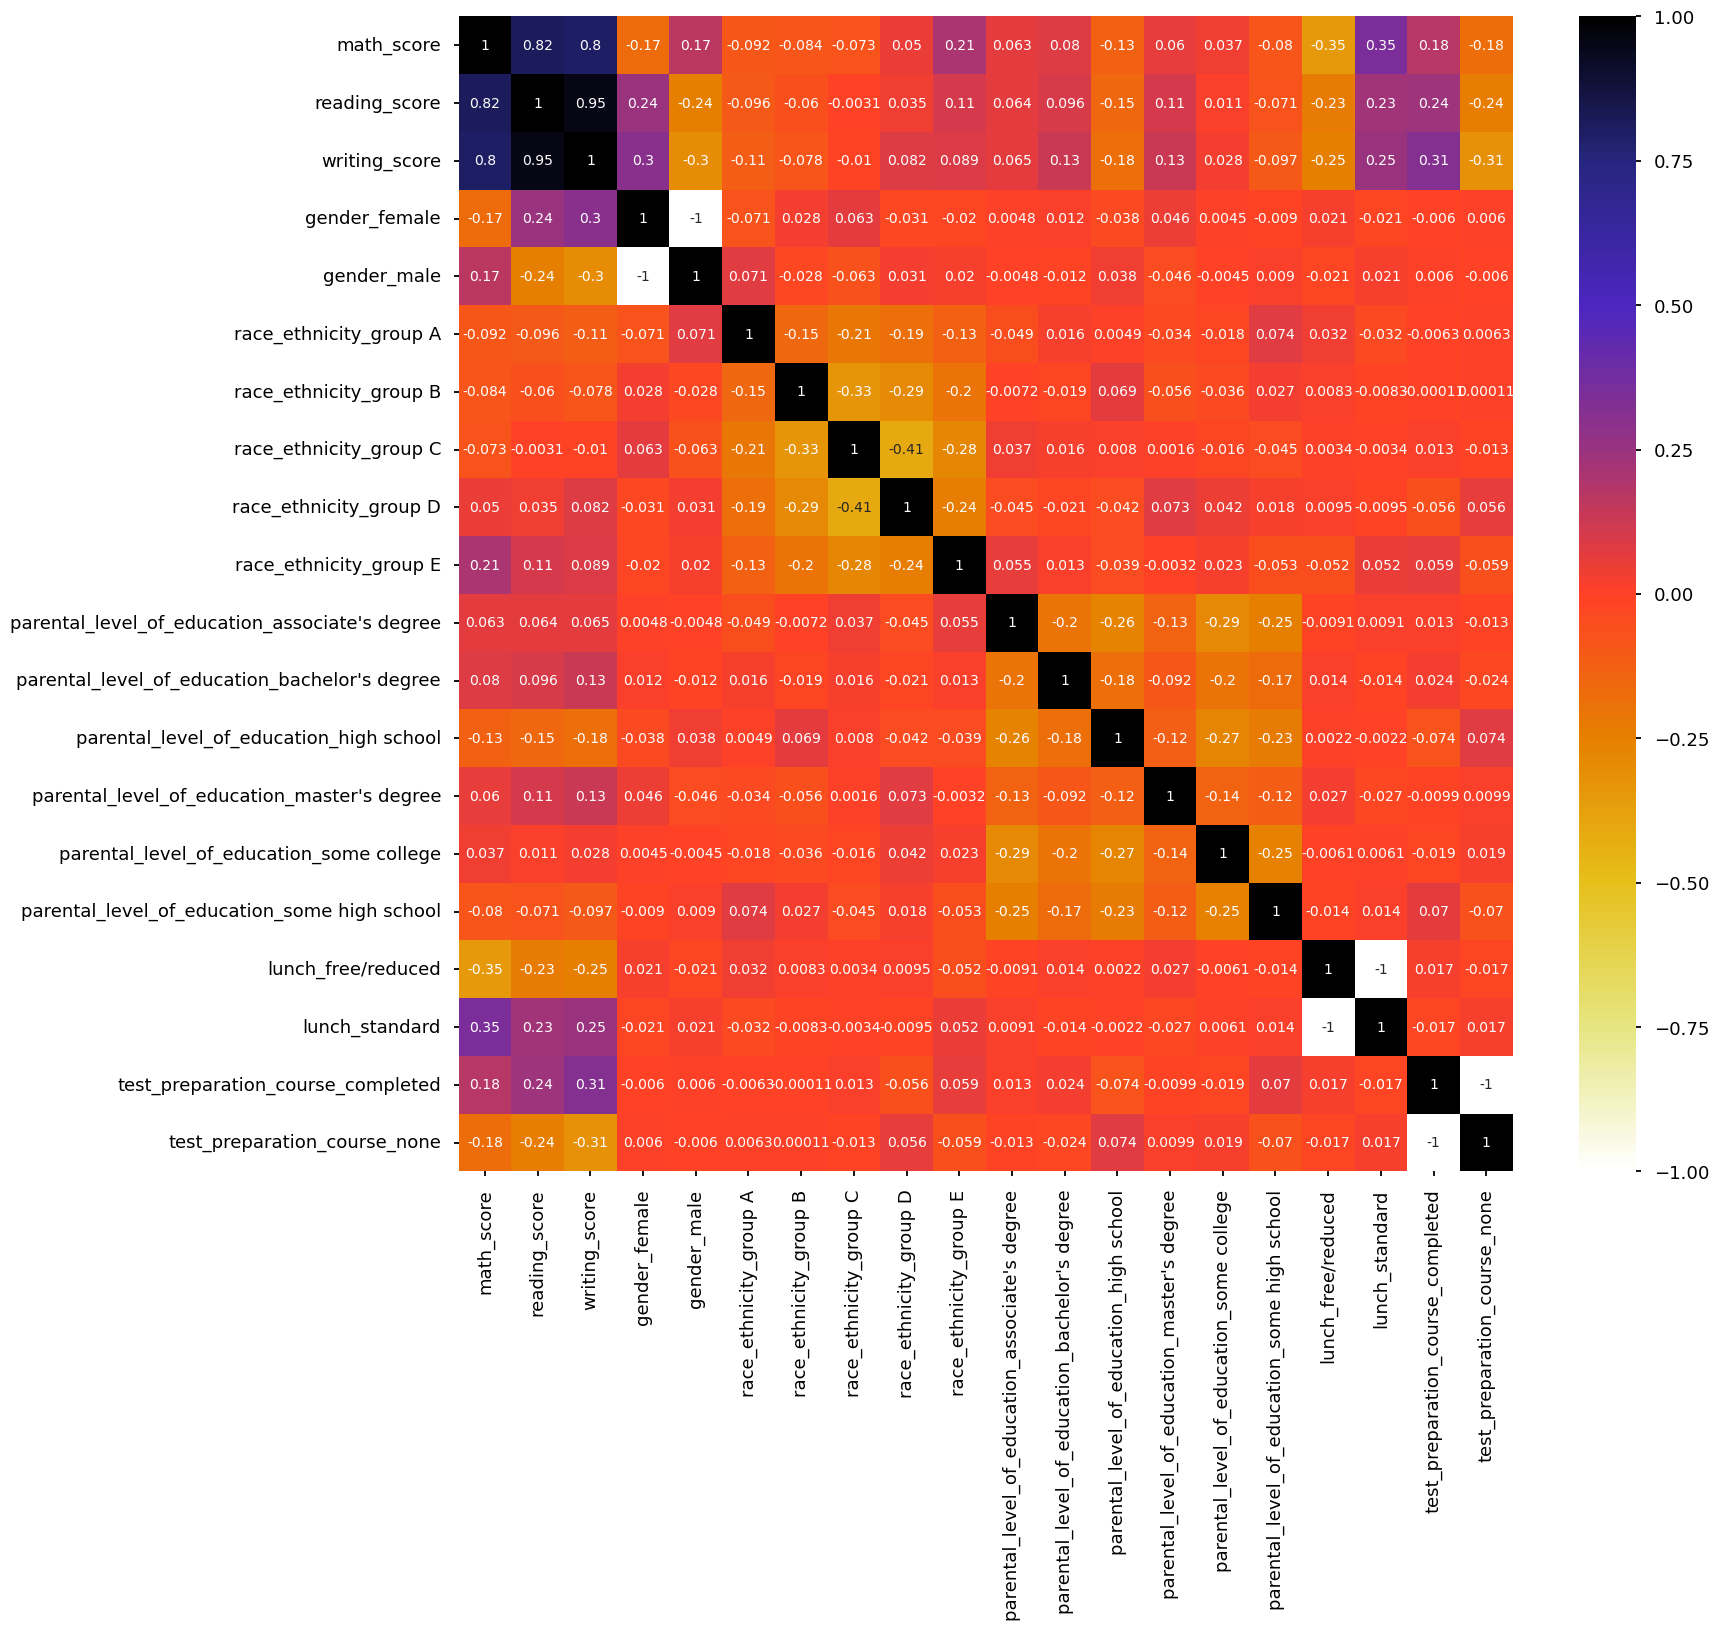

In [48]:
import seaborn as sns

plt.figure(figsize=(17,15))
cor = encoded_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [49]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [52]:
corr_features = correlation(encoded_df, 0.7)
len(set(corr_features))

2

In [53]:
corr_features

{'reading_score', 'writing_score'}

From above we got the 2 feature which is Highly co-related so 
these features we can remove it from original dataset.

Here Average_score is Target Variable .

<!-- Here Instead of removing these features I have taken AVERAGE of these THREE columns/features. -->

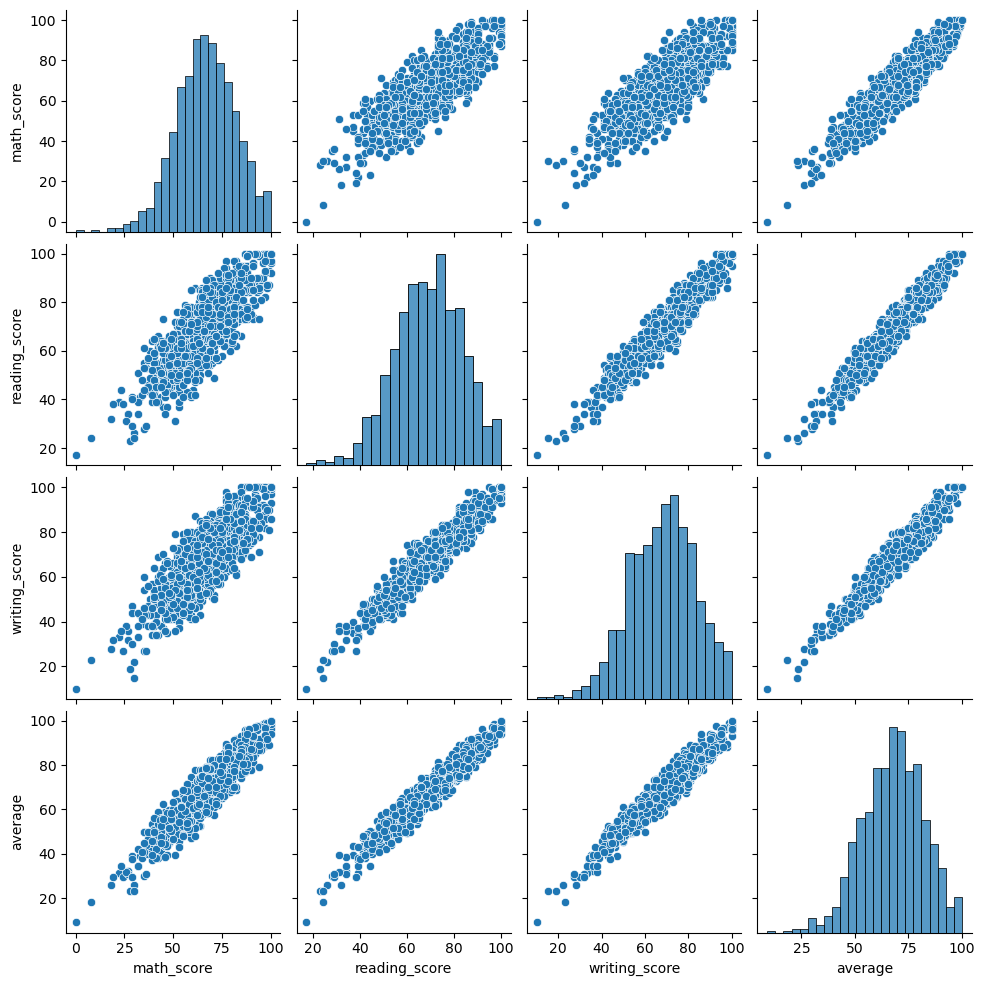

In [10]:
sns.pairplot(df1)
plt.show()